In [4]:
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

# 读取数据
df = pd.read_csv(r'C:\Users\logan\Documents\GitHub\daily-kaggle\kaggle playground\Titanic\source data\train.csv')

# 计算统计
missing = df.isnull().sum()
summary = df.describe(include='all').transpose()

# 更友好的显示设置（可选）
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 120)

# 标题
display(Markdown("# Titanic 数据分析（交互式显示）"))

# 数据预览
display(Markdown("## 数据预览 (Head)"))
display(df.head())

# 缺失值统计
display(Markdown("## 缺失值统计"))
display(missing.to_frame('missing_count'))

# 描述性统计
display(Markdown("## 描述性统计"))
display(summary)

# 类别特征分析
display(Markdown("## 类别特征分析"))
for column in df.select_dtypes(include=['object']).columns:
    display(Markdown(f"### {column} 类别分布"))
    display(df[column].value_counts().to_frame(name='count'))
    display(Markdown(f"#### {column} 与 Survived 的关系"))
    # 若 'Survived' 不在列里会报错，这里做一下保护
    if 'Survived' in df.columns:
        display(pd.crosstab(df[column], df['Survived']))

# 数值特征分析
display(Markdown("## 数值特征分析"))
for column in df.select_dtypes(include=['float64', 'int64', 'Int64', 'Float64']).columns:
    if column == 'Survived':
        continue
    display(Markdown(f"### {column} 分布"))
    display(df[column].describe().to_frame(name=column))
    display(Markdown(f"#### {column} 与 Survived 的关系"))
    if 'Survived' in df.columns:
        display(df.groupby('Survived')[column].mean().to_frame(name=f'{column}_mean'))

# 结论（文字）
display(Markdown("""
## 结论
根据数据分析，以下特征与生存率存在较强相关性：
- Pclass（乘客等级）
- Sex（性别）
- Age（年龄）
- SibSp（兄弟姐妹/配偶数量）
- Parch（父母/子女数量）
- Fare（票价）

建议在模型中重点考虑以上特征，并进行适当的特征工程处理。
"""))


# Titanic 数据分析（交互式显示）

## 数据预览 (Head)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 缺失值统计

,missing_count
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## 描述性统计

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


## 类别特征分析

### Name 类别分布

,count
Name,
"Braund, Mr. Owen Harris",1
"Boulos, Mr. Hanna",1
"Frolicher-Stehli, Mr. Maxmillian",1
"Gilinski, Mr. Eliezer",1
"Murdlin, Mr. Joseph",1
...,...
"Kelly, Miss. Anna Katherine ""Annie Kate""",1
"McCoy, Mr. Bernard",1
"Johnson, Mr. William Cahoone Jr",1


#### Name 与 Survived 的关系

Survived,0,1
Name,,
"Abbing, Mr. Anthony",1,0
"Abbott, Mr. Rossmore Edward",1,0
"Abbott, Mrs. Stanton (Rosa Hunt)",0,1
"Abelson, Mr. Samuel",1,0
"Abelson, Mrs. Samuel (Hannah Wizosky)",0,1
...,...,...
"de Mulder, Mr. Theodore",0,1
"de Pelsmaeker, Mr. Alfons",1,0
"del Carlo, Mr. Sebastiano",1,0


### Sex 类别分布

,count
Sex,
male,577
female,314


#### Sex 与 Survived 的关系

Survived,0,1
Sex,,
female,81,233
male,468,109


### Ticket 类别分布

,count
Ticket,
347082,7
CA. 2343,7
1601,7
3101295,6
CA 2144,6
...,...
9234,1
19988,1
2693,1


#### Ticket 与 Survived 的关系

Survived,0,1
Ticket,,
110152,0,3
110413,1,2
110465,2,0
110564,0,1
110813,0,1
...,...,...
W./C. 6608,4,0
W./C. 6609,1,0
W.E.P. 5734,1,0


### Cabin 类别分布

,count
Cabin,
B96 B98,4
G6,4
C23 C25 C27,4
C22 C26,3
F33,3
...,...
E34,1
C7,1
C54,1


#### Cabin 与 Survived 的关系

Survived,0,1
Cabin,,
A10,1,0
A14,1,0
A16,0,1
A19,1,0
A20,0,1
...,...,...
F33,0,3
F38,1,0
F4,0,2


### Embarked 类别分布

,count
Embarked,
S,644
C,168
Q,77


#### Embarked 与 Survived 的关系

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


## 数值特征分析

### PassengerId 分布

,PassengerId
count,891.000000
mean,446.000000
std,257.353842
min,1.000000
25%,223.500000
50%,446.000000
75%,668.500000
max,891.000000


#### PassengerId 与 Survived 的关系

,PassengerId_mean
Survived,
0,447.016393
1,444.368421


### Pclass 分布

,Pclass
count,891.000000
mean,2.308642
std,0.836071
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,3.000000


#### Pclass 与 Survived 的关系

,Pclass_mean
Survived,
0,2.531876
1,1.950292


### Age 分布

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


#### Age 与 Survived 的关系

,Age_mean
Survived,
0,30.626179
1,28.343690


### SibSp 分布

,SibSp
count,891.000000
mean,0.523008
std,1.102743
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,8.000000


#### SibSp 与 Survived 的关系

,SibSp_mean
Survived,
0,0.553734
1,0.473684


### Parch 分布

,Parch
count,891.000000
mean,0.381594
std,0.806057
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,6.000000


#### Parch 与 Survived 的关系

,Parch_mean
Survived,
0,0.329690
1,0.464912


### Fare 分布

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


#### Fare 与 Survived 的关系

,Fare_mean
Survived,
0,22.117887
1,48.395408



## 结论
根据数据分析，以下特征与生存率存在较强相关性：
- Pclass（乘客等级）
- Sex（性别）
- Age（年龄）
- SibSp（兄弟姐妹/配偶数量）
- Parch（父母/子女数量）
- Fare（票价）

建议在模型中重点考虑以上特征，并进行适当的特征工程处理。


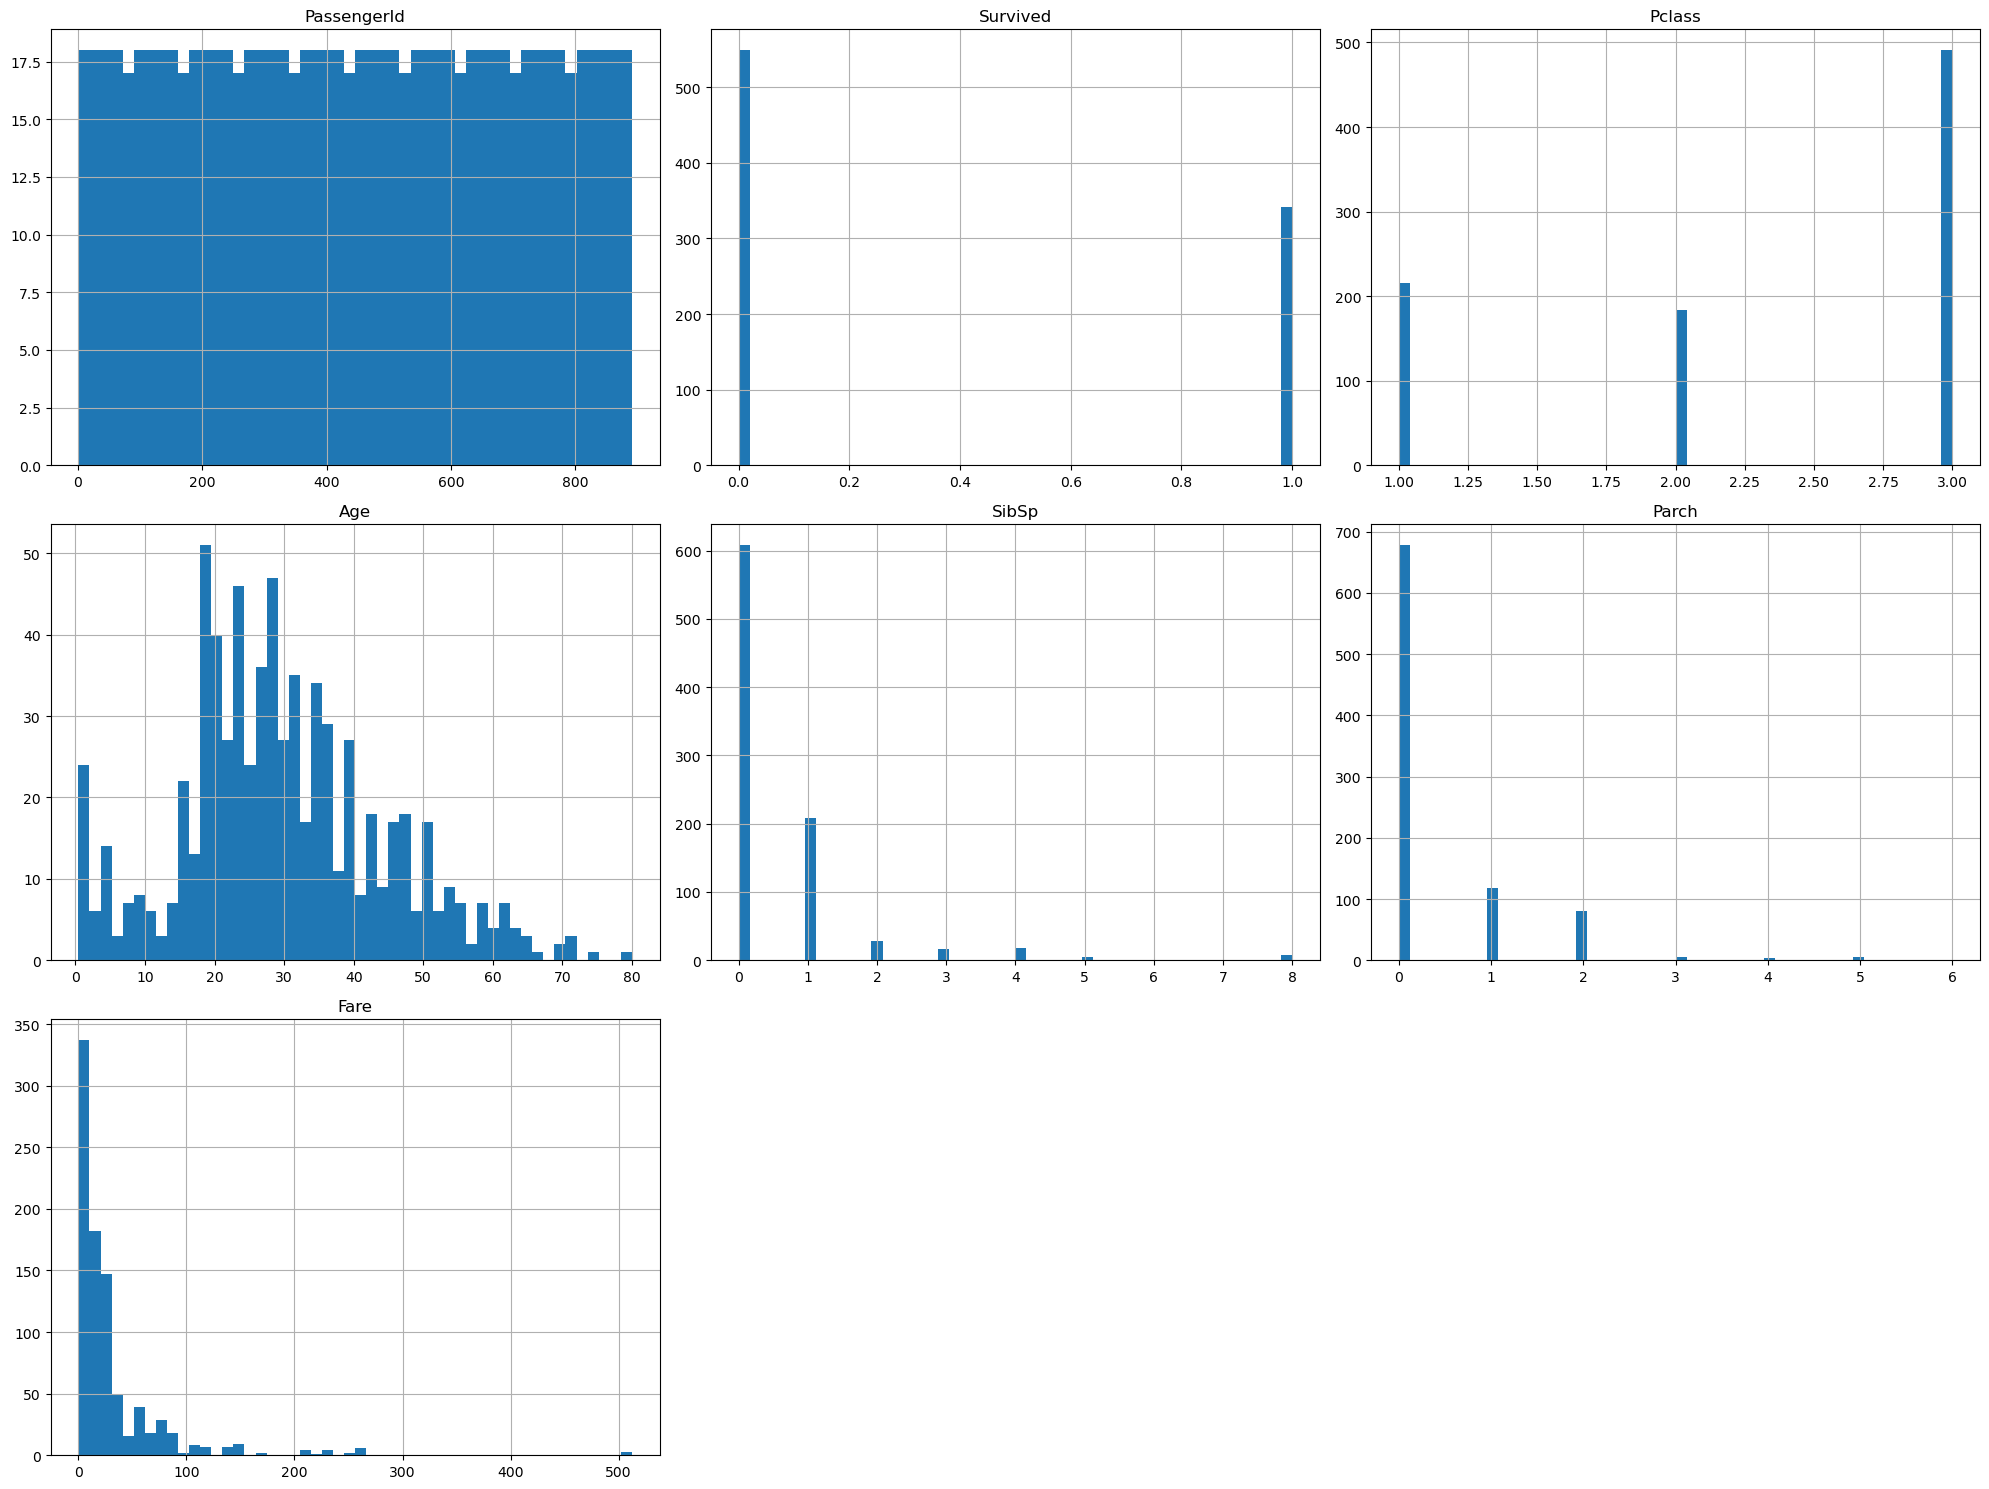

In [5]:
import matplotlib.pyplot as plt

# 所有数值列直方图
plt.rcParams['figure.figsize'] = (20, 15)
ax_array = df.hist(bins=50)
plt.tight_layout()
plt.show()


## 相关性分析

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


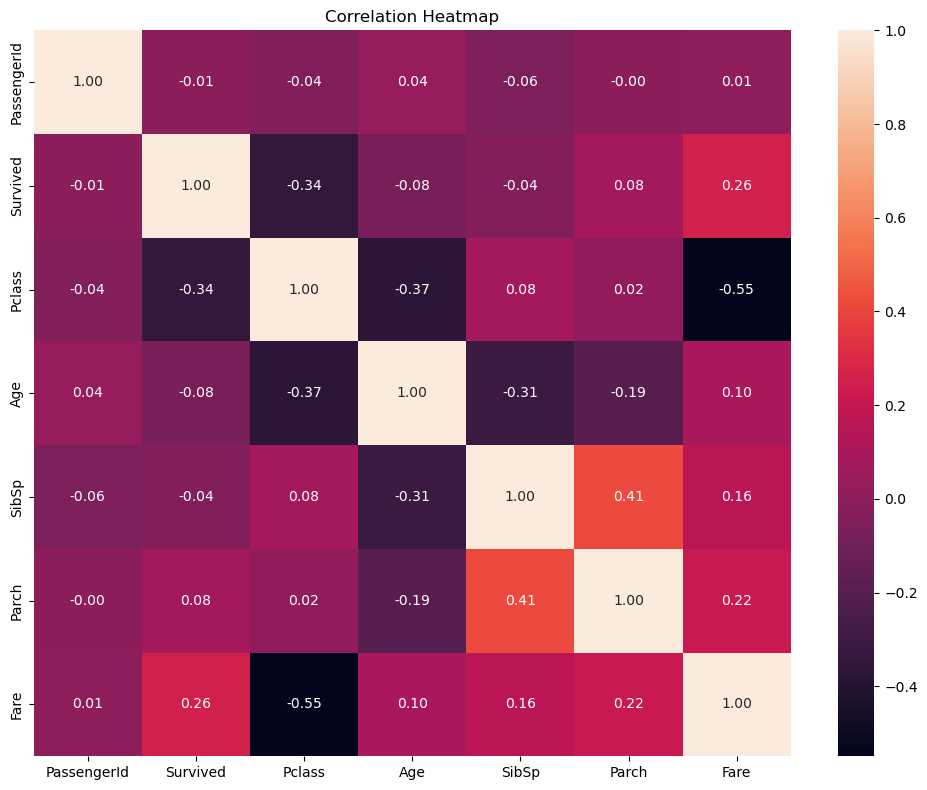

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

display(Markdown("## 相关性分析"))
corr = df.corr(numeric_only=True)
display(corr)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

